## Example of comparing maf run results ##

This notebook provides a demonstration of using MAF to compare the summary statistics coming from multiple runs. These summary statistics are visible using 'showMaf' for a single run (for example, see the results from [minion_1016](http://opsim.lsst.org:8080/allMetricResults?runId=7)), but we are developing tools to compare these summary statistics from multiple runs. This provides a small example.

Requirements:
To run this notebook, you need sims_maf version 2.3.6 or newer. 
You will also need some resultsDB_sqlite.db (maf results sqlite databases) files to query. We have provided the results dbs from minion_1016 (the current baseline) and minion_1012 (a run containing only the WFD proposal) in this git repo (in the "resultsDb" subdirectory in the tutorials directory). 

In [1]:
# import the modules needed.
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lsst.sims.maf.db import ResultsDb

Modify the next cell as needed to specify the location of your results database files. If you downloaded the [example set](http://www.astro.washington.edu/users/lynnej/opsim/results_example.tar.gz), set 'rootDir' below to the directory you wish to work with, and untar the 'results_example.tar.gz' file into that directory. 

Note that the connection to ResultsDB assumes the standard name for the resultsDB file (e.g. "resultsDb_sqlite.db"). If you modify these filenames, you should also modify the database name below. An example is given in the last line.

In [2]:
rootDir = 'resultsDb'
rundb = {}
rundb['minion_1016'] = ResultsDb(database=os.path.join(rootDir, 'minion_1016_scheduler_results.db'))
rundb['minion_1012'] = ResultsDb(database=os.path.join(rootDir, 'minion_1012_scheduler_results.db'))

There are various methods on the resultsDb to help you gather information that was recorded in the sqlite file. 
The most relevant methods, in order to compare metrics between runs, are the **getMetricId**, **getMetricDisplayInfo**, **getSummaryStats**, and **getPlotFiles** methods. These return numpy arrays with the relevant information. Generally, the first thing you'd want to do is identify the 'metricID' for a particular metric. You may know the metric name, the slicer name, and/or the metadata associated with the metric you want.  

In [3]:
help(rundb['minion_1016'].getMetricId)
help(rundb['minion_1016'].getMetricDisplayInfo)
help(rundb['minion_1016'].getSummaryStats)
help(rundb['minion_1016'].getPlotFiles)

Help on method getMetricId in module lsst.sims.maf.db.resultsDb:

getMetricId(metricName, slicerName=None, metricMetadata=None, simDataName=None) method of lsst.sims.maf.db.resultsDb.ResultsDb instance
    Given a metric name and optional slicerName/metricMetadata/simData information,
    Return a list of the matching metricIds.

Help on method getMetricDisplayInfo in module lsst.sims.maf.db.resultsDb:

getMetricDisplayInfo(metricId=None) method of lsst.sims.maf.db.resultsDb.ResultsDb instance
    Get the contents of the metrics and displays table, together with the 'basemetricname'
    (optionally, for metricId list).
    Returns a numpy array of the metric information + display information.

Help on method getSummaryStats in module lsst.sims.maf.db.resultsDb:

getSummaryStats(metricId=None, summaryName=None) method of lsst.sims.maf.db.resultsDb.ResultsDb instance
    Get the summary stats (optionally for metricId list).
    Optionally, also specify the summary metric name.
    Return

For example: you might want to look at the "Nvisits" metric results. In our scheduler validation metric runs, the "Nvisits" metric counts how many visits a field receives; without any further clarification, getMetricId will return the metric IDs associated with all metrics named Nvisits.  (There are actually one of these for each filter for each of 'All props', 'DD' and 'WFD' -- the information on the metrics available can be derived from the showMaf visualization of the MAF run results). 

In [4]:
metricName = 'NVisits'
mIds = {}
for r in rundb:
    mIds[r] = rundb[r].getMetricId(metricName=metricName)
    print(r, mIds[r])
    print('')

minion_1016 [167, 1709, 1710, 1701, 1689, 1939, 1120, 1213, 1022, 566, 627, 1187, 1043, 1105, 2530, 2605, 2621, 2606, 889, 899, 2401, 808, 820, 1393, 112, 1330, 1772, 1705, 294, 1706, 1707]

minion_1012 [172, 185, 186, 1010, 768, 914, 337, 841, 463, 255, 1145, 1173, 1159, 692, 936, 557, 543, 114, 188, 187]



We can also specify a particular metadata value -- so let's look for Nvisits metric results for the r band, WFD only.

In [5]:
# Retrieve all summary statistics for a metric + set of metric metadata + for a particular slicer.
metricName = 'NVisits'
metricMetadata = 'i band, WFD'
mIds = {}
for r in rundb:
    mIds[r] = rundb[r].getMetricId(metricName=metricName, metricMetadata=metricMetadata)
    print(r, mIds[r])

minion_1016 [1213]
minion_1012 [914]


With this very specific information and the metricIds associated with this specific metric, we can then get the plots associated with this metric and the summary statistics.

In [6]:
for r in rundb:
    plotFiles = rundb[r].getPlotFiles(mIds[r])
    summaryStats = rundb[r].getSummaryStats(mIds[r])
    print("Run %s" %r)
    print(plotFiles['plotFile']) # this is a numpy array with the metric information + plot file name
    print(summaryStats)
    print('')

Run minion_1016
[b'minion_1016_NVisits_i_band_WFD_OPSI_SkyMap.pdf'
 b'minion_1016_NVisits_i_band_WFD_OPSI_Histogram.pdf']
[ (1213, b'NVisits', b'OpsimFieldSlicer', b'i band, WFD', b'Mean',   200.34452682)
 (1213, b'NVisits', b'OpsimFieldSlicer', b'i band, WFD', b'Rms',     3.00441773)
 (1213, b'NVisits', b'OpsimFieldSlicer', b'i band, WFD', b'Median',   201.        )
 (1213, b'NVisits', b'OpsimFieldSlicer', b'i band, WFD', b'Count',  2293.        )
 (1213, b'NVisits', b'OpsimFieldSlicer', b'i band, WFD', b'N(+3Sigma)',     0.        )
 (1213, b'NVisits', b'OpsimFieldSlicer', b'i band, WFD', b'N(-3Sigma)',     0.        )
 (1213, b'NVisits', b'OpsimFieldSlicer', b'i band, WFD', b'25th%ile',   197.        )
 (1213, b'NVisits', b'OpsimFieldSlicer', b'i band, WFD', b'75th%ile',   203.        )
 (1213, b'NVisits', b'OpsimFieldSlicer', b'i band, WFD', b'Min',   194.        )
 (1213, b'NVisits', b'OpsimFieldSlicer', b'i band, WFD', b'Max',   207.        )]

Run minion_1012
[b'minion_1012_NVis

And if we had a very specific summary statistic we wanted to get, for a very specific metric, slicer and metric metadata combination: 

In [7]:
metricName = 'NVisits'
slicerName = 'OneDSlicer'
metricMetadata  = 'Per night'  # capitalization matters!
summaryStatName = 'Median'

stats = {}
for r in rundb:
    mIds = rundb[r].getMetricId(metricName=metricName, metricMetadata=metricMetadata, slicerName=slicerName)
    stats[r] = rundb[r].getSummaryStats(mIds, summaryName=summaryStatName)   

At this point, 'stats' is a dictionary containing a numpy array with fields "metricId", "metricMetadata, "slicerName",  "summaryName" and "summaryValue" for each statistic that matches the metricIds: (i.e. all the metric info and the summary statistic info). 

In [8]:
# All of the values in stats
print(stats['minion_1016'])
# And the relevant 'summaryValue' -- of which there is only one, because we used one metricID and one summaryStatName.
print(stats['minion_1016']['summaryValue'])

[(167, b'NVisits', b'OneDSlicer', b'Per night', b'Median',  816.)]
[ 816.]


In [9]:
# So you can easily create bigger tables or ratios:
baseline = stats['minion_1016']['summaryValue'][0]
for r in rundb:
    print(r, stats[r]['summaryValue'][0], stats[r]['summaryValue'][0]/baseline)

minion_1016 816.0 1.0
minion_1012 807.0 0.988970588235


In [10]:
# Or you could pull out several summary statistics, to plot together.

# Nice names for the comparisons we'll do (nice names for a plot)
metricComparisons = ['Nights in survey', 'Total NVisits', 'NVisits Per night', 'Mean slew time', 'Mean Nfilter changes', 
                     'Total Nfilter changes', 'Median Nvisits WFD', 'Median Nvisits r All']
# But we need to know how to pull this info out of the resultsDB, so get the actual metric names, metadata, summaryName.
metricInfo = [{'metricName':'Total nights in survey', 'metadata':None, 'summary':None},
              {'metricName':'NVisits', 'metadata':'All Visits', 'summary':None},
              {'metricName':'NVisits', 'metadata':'Per night', 'summary':'Median'},
              {'metricName':'Mean slewTime', 'metadata':None, 'summary':None},
              {'metricName':'Filter Changes', 'metadata':'Per night', 'summary':'Mean'}, 
              {'metricName':'Total Filter Changes', 'metadata':'All visits', 'summary':None},
              {'metricName':'NVisits', 'metadata':'All filters, WFD', 'summary':'Median'},
              {'metricName':'NVisits', 'metadata':'r band, all props', 'summary':'Median'}]

stats = {}
for r in rundb:
    stats[r] = np.empty((len(metricComparisons)), dtype=([('name', np.str, 50), ('value', float)]))
    for i, (mComparison, mInfo) in enumerate(zip(metricComparisons, metricInfo)):
        mIds = rundb[r].getMetricId(metricName=mInfo['metricName'], metricMetadata=mInfo['metadata'])
        s = rundb[r].getSummaryStats(mIds, summaryName=mInfo['summary'])
        if len(s) == 0:
            print("Could not find metric summary stat matching info for :")
            print("\t", r, mComparison)
            print("\t", mInfo)
        else:
            stats[r]['name'][i] = mComparison
            stats[r]['value'][i] = s['summaryValue'][0]

# Let's print the results.
for r in rundb:
    print(r)
    print(stats[r])

minion_1016
[('Nights in survey',   3.65000000e+03) ('Total NVisits',   2.44793100e+06)
 ('NVisits Per night',   8.16000000e+02)
 ('Mean slew time',   6.82073495e+00)
 ('Mean Nfilter changes',   4.28717779e+00)
 ('Total Nfilter changes',   1.41940000e+04)
 ('Median Nvisits WFD',   9.12000000e+02)
 ('Median Nvisits r All',   1.97000000e+02)]
minion_1012
[('Nights in survey',   3.65000000e+03) ('Total NVisits',   2.42193300e+06)
 ('NVisits Per night',   8.07000000e+02)
 ('Mean slew time',   7.23858778e+00)
 ('Mean Nfilter changes',   3.21454545e+00)
 ('Total Nfilter changes',   1.09480000e+04)
 ('Median Nvisits WFD',   9.74000000e+02)
 ('Median Nvisits r All',   2.16000000e+02)]


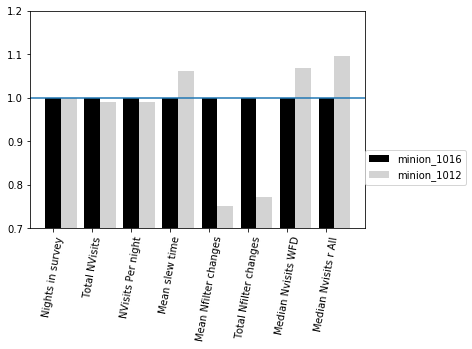

In [11]:
# Because the scales will be quite different (# of visits vs. # of filter changes, for example), normalize
#   both by dividing by the first set of values (or pick another baseline).

baseline = stats['minion_1016']['value']
xoffset = 0.8/(float(len(rundb)))
x = np.arange(len(baseline))
colors = ['k', 'lightgrey', 'r']
for i, r in enumerate(rundb):
    plt.bar(x+i*xoffset, stats[r]['value']/baseline, width=xoffset, color=colors[i], label=r)
plt.xticks(x, stats[r]['name'], rotation=80)
plt.axhline(1.0)
plt.ylim(0.7, 1.2)
plt.legend(loc=(1.0, 0.2))

We can also do more general comparisons. We can query for all of the metrics and summary statistics; Pandas becomes useful at this point, for slicing and dicing these bigger arrays. 


In [12]:
import pandas as pd

# Pull out *ALL* the summary stats from the results database, joined with the metric information.
metrics = {}
stats = {}
for r in rundb:
    metrics[r] = rundb[r].getMetricDisplayInfo()
    stats[r] = rundb[r].getSummaryStats()
    metrics[r] = pd.DataFrame(metrics[r])
    stats[r] = pd.DataFrame(stats[r])

In [13]:
# This will not be necessary in the future, but until bytes/strings are completely sorted out, it's around for now.
def convertbytes(x):
    try:
        return x.decode('utf-8')
    except AttributeError:
        return x

for r in rundb:
    metrics[r] = metrics[r].applymap(convertbytes)
    stats[r] = stats[r].applymap(convertbytes)
    
    
print(metrics['minion_1016'].iloc[98])
print('')
print(stats['minion_1016'].iloc[98])

metricId                                                          99
metricName                                            Median FWHMeff
baseMetricNames                                       Median FWHMeff
slicerName                                                 UniSlicer
sqlConstraint                                                       
metricMetadata                                   all band, all props
metricDataFile     minion_1016_Median_FWHMeff_all_band_all_props_...
displayGroup                                               G: Seeing
displaySubgroup                                            All Props
displayOrder                                                    3324
displayCaption     Median FWHMeff calculated on a UniSlicer basis...
Name: 98, dtype: object

metricId                           99
metricName             Median FWHMeff
slicerName                  UniSlicer
metricMetadata    all band, all props
summaryName                  Identity
summaryValue              

In [14]:
# Let's pull out all the metrics for subgroup 'WFD' in the Seeing group.
# We'll put these in a dataframe which we'll later compare between the two runs to find the ones present in both.
# We'll pull out the percentile and N+-3sigma metrics.

groupList = ['G: Seeing' ]

mStats = {}
for r in rundb:
    m = metrics[r].query('displaySubgroup == "WFD"')
    m = m.query('displayGroup in @groupList')
    m = m.query('slicerName != "OneDSlicer"')
    m = m[m.metricName.str.contains('%ile') == False]
    m = m[m.metricName.str.contains('N') == False]
    m = m[m.metricName.str.contains('Count') == False]
    mIds = m.metricId 
    s = stats[r].query('metricId in @mIds')
    # And cut it down a little further by throwing out some of the summary stats too. 
    s = s[s.summaryName.str.contains('%ile') == False] 
    s = s[s.summaryName.str.contains('N') == False]
    s = s[s.summaryName.str.contains('Count') == False]
    mStats[r] = s
    # we could have done this using getSummaryStats directly on the resultsDb too.
    print(r, len(mStats[r]))

minion_1016 39
minion_1012 39


In [15]:
# Pull out summary stats common to both runs and join into one data frame.
compStats = pd.merge_ordered(mStats['minion_1016'], mStats['minion_1012'], how='inner', 
                       on=('metricName', 'slicerName', 'metricMetadata', 'summaryName'),
                       suffixes=('_minion_1016', '_minion_1012'))
#compStats

In [16]:
# Add names which are nicer to plot.
def makeName(x):
    if x.summaryName == 'Identity':
        mName = ' '.join([x.metricName, x.metricMetadata])
    else:
        mName = ' '.join([x.summaryName, x.metricName, x.metricMetadata])
    return mName
     
compStats['mname'] = compStats.apply(makeName, axis=1)
#compStats

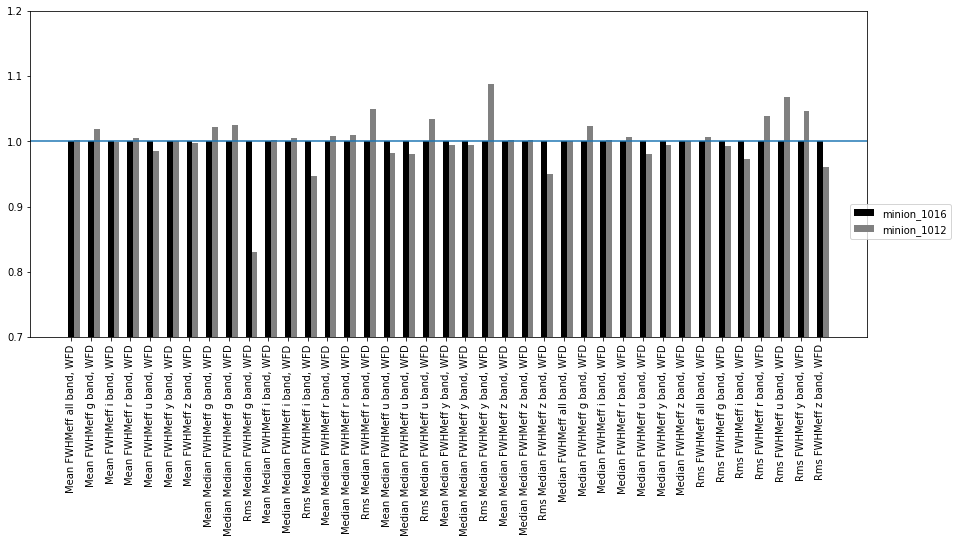

In [17]:
baseline= 'minion_1016'
xoffset = .6/(float(len(rundb)))
x = np.arange(len(compStats))
plt.figure(figsize=(15, 6))
colors = ['k', 'gray', 'lightgray']
for i, r in enumerate(rundb):
    plt.bar(x+i*xoffset, compStats['summaryValue_%s' % r]/compStats['summaryValue_%s' % baseline], 
            width=xoffset, color=colors[i], label=r)
plt.xticks(x, compStats['mname'], rotation=90)
plt.axhline(1.0)
plt.ylim(0.7, 1.2)
plt.legend(loc=(0.98, 0.3))